In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Load the data

In [2]:
airlines=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

### To study the data

In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### checking for duplicate values

In [4]:
airlines[airlines.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


#### There are no duplicate values

### To change the categorical variable to number

In [5]:
r1=(0+5000)/2
r2=(10000+5001)/2
r3=(10001+25000)/2
r4=(25001+50000)/2
r5=75000

In [6]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Dropping the unwanted columns

In [7]:
airlines.drop('ID#',axis=1,inplace=True)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


## Copying data because we need to the data for other clustering models

In [8]:
airlinescp=airlines.copy()
airlinescp

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airlinescp['cc1_miles'][airlinescp['cc1_miles']==1]=r1
airlinescp['cc1_miles'][airlinescp['cc1_miles']==2]=r2
airlinescp['cc1_miles'][airlinescp['cc1_miles']==3]=r3
airlinescp['cc1_miles'][airlinescp['cc1_miles']==4]=r4
airlinescp['cc1_miles'][airlinescp['cc1_miles']==5]=r5
airlinescp['cc2_miles'][airlinescp['cc2_miles']==1]=r1
airlinescp['cc2_miles'][airlinescp['cc2_miles']==2]=r2
airlinescp['cc2_miles'][airlinescp['cc2_miles']==3]=r3
airlinescp['cc2_miles'][airlinescp['cc2_miles']==4]=r4
airlinescp['cc2_miles'][airlinescp['cc2_miles']==5]=r5
airlinescp['cc3_miles'][airlinescp['cc3_miles']==1]=r1
airlinescp['cc3_miles'][airlinescp['cc3_miles']==2]=r2
airlinescp['cc3_miles'][airlinescp['cc3_miles']==3]=r3
airlinescp['cc3_miles'][airlinescp['cc3_miles']==4]=r4
airlinescp['cc3_miles'][airlinescp['cc3_miles']==5]=r5

## Scaling data

In [10]:
ss=StandardScaler()
x=ss.fit_transform(airlinescp)

In [11]:
airlinescp

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,2500.0,2500.0,2500.0,174,1,0,0,7000,0
1,19244,0,2500.0,2500.0,2500.0,215,2,0,0,6968,0
2,41354,0,2500.0,2500.0,2500.0,4123,4,0,0,7034,0
3,14776,0,2500.0,2500.0,2500.0,500,1,0,0,6952,0
4,97752,0,37500.5,2500.0,2500.0,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,2500.0,2500.0,2500.0,8525,4,200,1,1403,1
3995,64385,0,2500.0,2500.0,2500.0,981,5,0,0,1395,1
3996,73597,0,17500.5,2500.0,2500.0,25447,8,0,0,1402,1
3997,54899,0,2500.0,2500.0,2500.0,500,1,500,1,1401,0


# Hierarchial Clustering

## Trying euclidean as distance

### Dendrogram

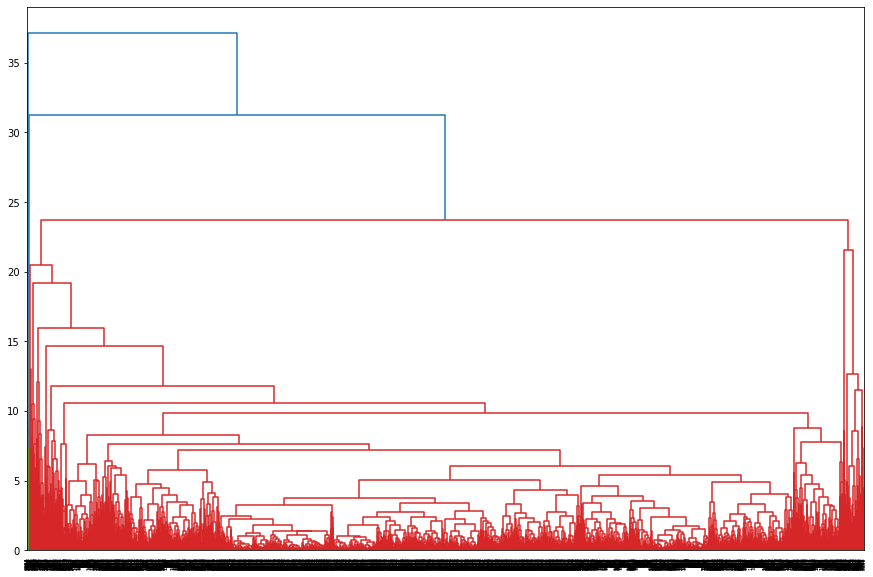

In [12]:
plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(x,metric='euclidean',method='complete'))

## Model buliding

### Using 3 clusters

In [13]:
hc3=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc3=hc3.fit_predict(x)
airlinescp['cluster_id']=pd.Series(y_hc3)
airlinescp['cluster_id'].value_counts()

0    3986
1      11
2       2
Name: cluster_id, dtype: int64

### Using 4 clusters

In [14]:
hc4=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
y_hc4=hc4.fit_predict(x)
airlinescp['cluster_id']=pd.Series(y_hc4)
airlinescp['cluster_id'].value_counts()

1    3888
0      98
3      11
2       2
Name: cluster_id, dtype: int64

### Using 5 cluster

In [15]:
hc5=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc5=hc5.fit_predict(x)
airlinescp['cluster_id']=pd.Series(y_hc5)
airlinescp['cluster_id'].value_counts()

0    3888
3      83
4      15
1      11
2       2
Name: cluster_id, dtype: int64

#### These three clusters doesn't gives a satisfactory results

## Tring cosine as distance 

###  Dendrogram

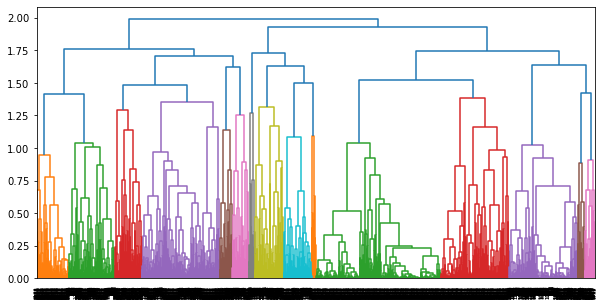

In [16]:
plt.figure(figsize=(10,5))
dendrogram=sch.dendrogram(sch.linkage(x,metric='cosine',method='complete'))

## Model building

### Using 3 clusters

In [17]:
hc3=AgglomerativeClustering(n_clusters=3,affinity='cosine',linkage='complete')
y_hc3=hc3.fit_predict(x)
airlinescp['cluster_id']=pd.Series(y_hc3)
airlinescp['cluster_id'].value_counts()

1    1995
0    1519
2     485
Name: cluster_id, dtype: int64

In [18]:
airlinescp.groupby('cluster_id').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id,,,,,,,,,,,
0,97673.628045,332.202107,23084.498683,2740.303818,2503.291968,27993.405530,15.492429,798.375247,2.490454,4564.377222,0.955892
1,41611.427569,30.608020,4560.242105,2500.000000,2500.000000,4660.698246,6.899248,163.988972,0.541855,3549.589474,0.000000
2,129795.195876,21.929897,32381.803093,2500.000000,3824.754639,34519.925773,18.760825,618.294845,1.296907,5062.678351,0.059794


#### The mean with respect to the cluster give clearly distinct results

# K-mean clustering

### Elbow graph

[43989.0, 35502.82205786182, 31246.16759912326, 27978.204147080272, 24919.32799459278, 22452.992929698106, 19596.505495645255, 17851.850357627543, 16798.131672801206, 15270.725170016602]


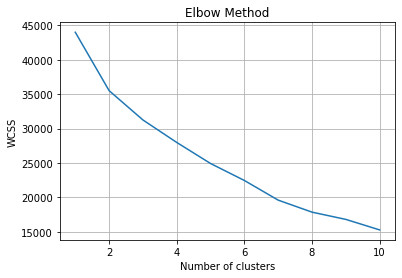

In [19]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

### Trying with 4 clusters

In [20]:
clusters_new=KMeans(n_clusters=4,random_state=0)
clusters_new.fit(x)
pd.Series(clusters_new.labels_).value_counts()

1    2911
0     903
2     170
3      15
dtype: int64

In [21]:
airlinescp2=airlinescp.copy()

In [22]:
airlinescp2['cluster_id_kmeans']=clusters_new.labels_

In [23]:
airlinescp2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,cluster_id_kmeans
0,28143,0,2500.0,2500.0,2500.0,174,1,0,0,7000,0,1,1
1,19244,0,2500.0,2500.0,2500.0,215,2,0,0,6968,0,1,1
2,41354,0,2500.0,2500.0,2500.0,4123,4,0,0,7034,0,1,1
3,14776,0,2500.0,2500.0,2500.0,500,1,0,0,6952,0,1,1
4,97752,0,37500.5,2500.0,2500.0,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,2500.0,2500.0,2500.0,8525,4,200,1,1403,1,0,1
3995,64385,0,2500.0,2500.0,2500.0,981,5,0,0,1395,1,0,1
3996,73597,0,17500.5,2500.0,2500.0,25447,8,0,0,1402,1,0,1
3997,54899,0,2500.0,2500.0,2500.0,500,1,500,1,1401,0,1,1


In [24]:
airlinescp2.groupby('cluster_id_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
cluster_id_kmeans,,,,,,,,,,,,
0,137098.491694,152.325581,44668.115172,2511.075305,3194.911960,48950.554817,19.932447,382.758583,1.157254,5053.627907,0.677741,0.653378
1,47342.556510,104.528684,5627.921505,2541.227070,2501.717795,6466.910340,8.109928,198.134318,0.611130,3795.768808,0.249399,0.796633
2,187847.752941,785.182353,18308.961765,2558.829412,2588.238235,30756.211765,26.500000,5335.135294,15.417647,4682.805882,0.805882,0.329412
3,52231.400000,66.666667,2500.000000,17500.500000,2500.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000,0.000000


#### The means are sufficiently different

# DBSCAN Clustering

In [25]:
x

array([[-4.51140783e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  1.23419619e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -6.08427105e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
airlinescp3=airlinescp.copy()

In [27]:
dbscan = DBSCAN(eps=2.0, min_samples=20)
dbscan.fit(x)

DBSCAN(eps=2.0, min_samples=20)

In [28]:
airlinescp3['cluster_id_dbscan']=pd.Series(dbscan.labels_)

In [29]:
airlinescp3['cluster_id_dbscan'].value_counts()

 0    2432
 1    1280
-1     287
Name: cluster_id_dbscan, dtype: int64

In [30]:
X=metrics.silhouette_score(x,dbscan.labels_)
X

0.25989805005870703

In [38]:
def Dbscan(X,eps,min_samples):
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
    plt.title("DBSCAN")

### PLOT the graph for eps=2 and mins_samples=8

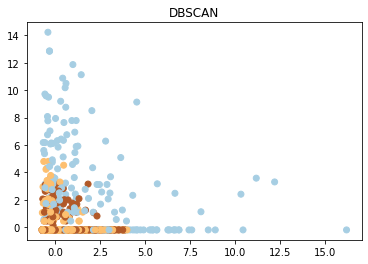

In [39]:
Dbscan(x,2,20)

In [41]:
airlinescp3.groupby('cluster_id_dbscan').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
cluster_id_dbscan,,,,,,,,,,,,
-1,211522.372822,1416.522648,26054.153310,3771.851916,4703.850174,44293.425087,24.254355,2983.822300,8.616725,4701.456446,0.700348,0.285714
0,57221.907484,34.654194,9670.168586,2500.000000,2504.112253,9707.329770,8.837171,182.018914,0.540296,3811.555510,0.000000,1.173931
1,73797.741406,66.791406,22556.889844,2500.000000,2503.906641,25188.907031,14.017969,422.450000,1.332812,4571.170313,1.000000,0.021875


### Clustering was done with best results with 3 clustering for hierarchical, 4 clusters with K-Means and 3 clusters including outliers with DBSCAN

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++